<a href="https://colab.research.google.com/github/Mubin-A-Kader/Country-aid-clustering-/blob/main/NGO_ScalerCountry_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://drive.google.com/file/d/1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj/view
!gdown 1IRQWbO9m-c93XjDsbtt2nqv5RVldVPzj

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [102]:
df = pd.read_csv('/content/Country-data.csv')

In [103]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [104]:
def winsorize_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers directly in the original column
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

    return data

df = winsorize_outliers(df.copy(), 'child_mort')
df = winsorize_outliers(df.copy(), 'income')
df = winsorize_outliers(df.copy(), 'gdpp')

print(df[['child_mort', 'income', 'gdpp']].describe())
df.tail()

       child_mort        income          gdpp
count  167.000000    167.000000    167.000000
mean    37.698204  15921.574850  10351.281437
std     38.443293  15207.197459  11612.044330
min      2.600000    609.000000    231.000000
25%      8.250000   3355.000000   1330.000000
50%     19.300000   9960.000000   4660.000000
75%     62.100000  22800.000000  14050.000000
max    142.875000  51967.500000  33130.000000


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0
166,Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1460.0


In [105]:
df['income_bin'] = pd.cut(df['income'], bins=5, labels=['Low', 'Lower-Middle', 'Middle', 'Upper-Middle', 'High'])
df['income_bin']

,income_bin
0,Low
1,Low
2,Lower-Middle
3,Low
4,Lower-Middle
...,...
162,Low
163,Lower-Middle
164,Low
165,Low


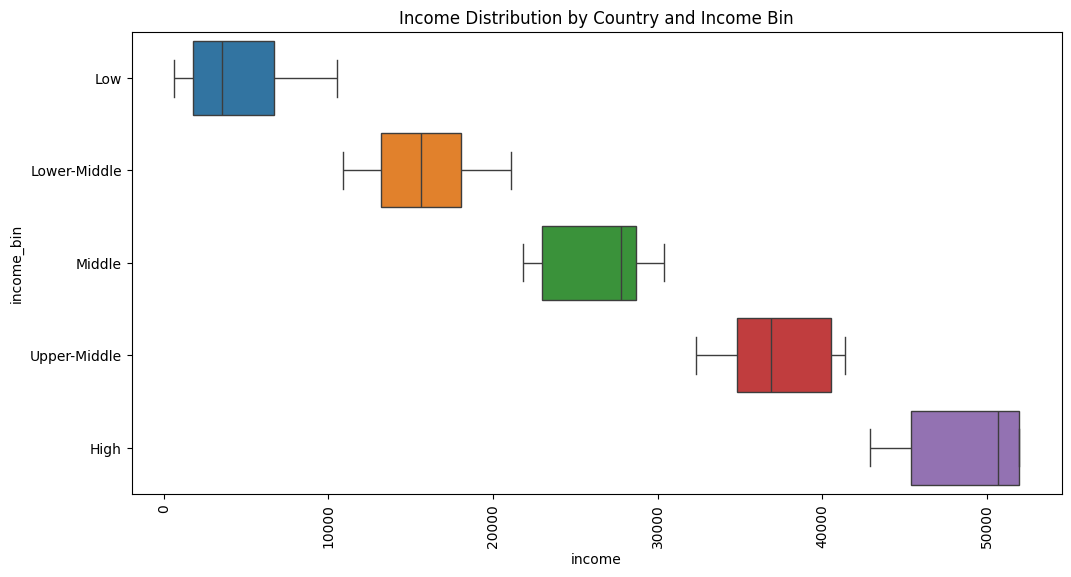

In [106]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='income_bin', hue='income_bin', data=df)
plt.xticks(rotation=90)
plt.title('Income Distribution by Country and Income Bin')
plt.show()

In [107]:
lowest_income_countries = df[df['income_bin'] == 'Low'].sort_values('income').head(30)
lowest_income_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_bin
37,"Congo, Dem. Rep.",116.000,41.10,7.91,49.6,609.0,20.800,57.5,6.54,334.0,Low
88,Liberia,89.300,19.10,11.80,92.6,700.0,5.470,60.8,5.02,327.0,Low
26,Burundi,93.600,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,Low
112,Niger,123.000,22.20,5.16,49.1,814.0,2.550,58.8,7.49,348.0,Low
31,Central African Republic,142.875,11.80,3.98,26.5,888.0,2.010,47.5,5.21,446.0,Low
106,Mozambique,101.000,31.50,5.21,46.2,918.0,7.640,54.5,5.56,419.0,Low
94,Malawi,90.500,22.80,6.59,34.9,1030.0,12.100,53.1,5.31,459.0,Low
63,Guinea,109.000,30.30,4.93,43.2,1190.0,16.100,58.0,5.34,648.0,Low
150,Togo,90.300,40.20,7.65,57.3,1210.0,1.180,58.7,4.87,488.0,Low
132,Sierra Leone,142.875,16.80,13.10,34.5,1220.0,17.200,55.0,5.20,399.0,Low


            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.320506 -0.214802 -0.138620 -0.617662   0.302947   
exports      -0.320506  1.000000 -0.114408  0.737381  0.486247  -0.107294   
health       -0.214802 -0.114408  1.000000  0.095717  0.246458  -0.255376   
imports      -0.138620  0.737381  0.095717  1.000000  0.095378  -0.246994   
income       -0.617662  0.486247  0.246458  0.095378  1.000000  -0.184856   
inflation     0.302947 -0.107294 -0.255376 -0.246994 -0.184856   1.000000   
life_expec   -0.877092  0.316313  0.210692  0.054391  0.692390  -0.239705   
total_fer     0.879408 -0.320011 -0.196674 -0.159048 -0.577832   0.316921   
gdpp         -0.588048  0.384651  0.358150  0.058509  0.954085  -0.242685   

            life_expec  total_fer      gdpp  
child_mort   -0.877092   0.879408 -0.588048  
exports       0.316313  -0.320011  0.384651  
health        0.210692  -0.196674  0.358150  
imports       0.054391  -0.159048  0.058509  

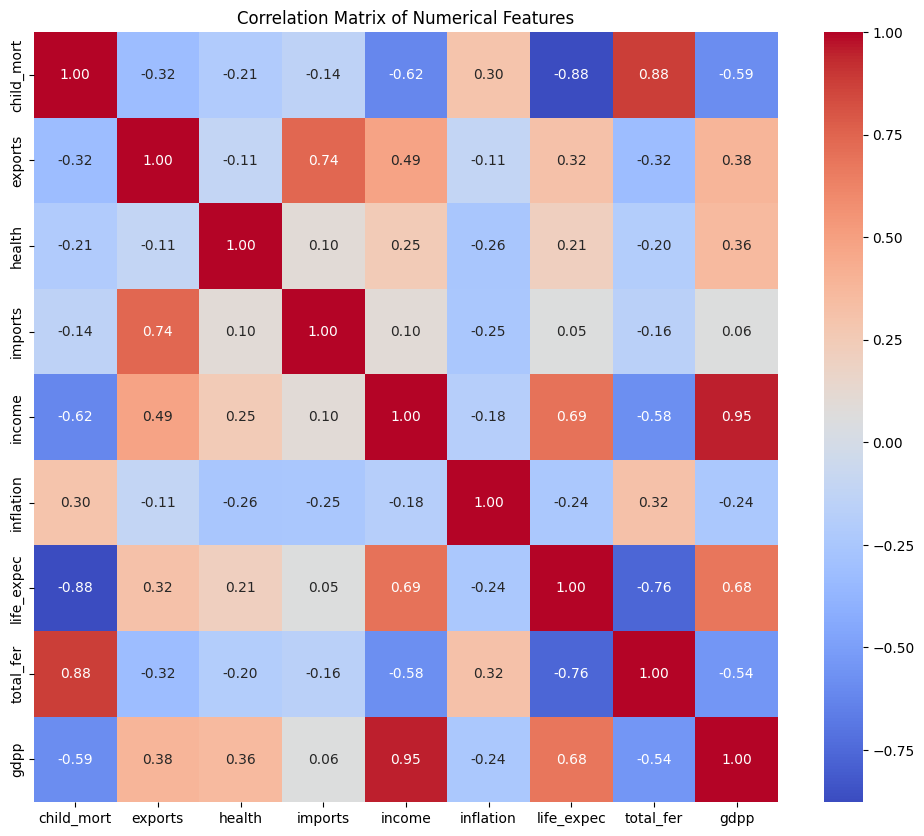

In [108]:
# Visualize the correlation matrix using a heatmap

import matplotlib.pyplot as plt
correlation_matrix = df.select_dtypes(include=np.number).corr()
print(correlation_matrix)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

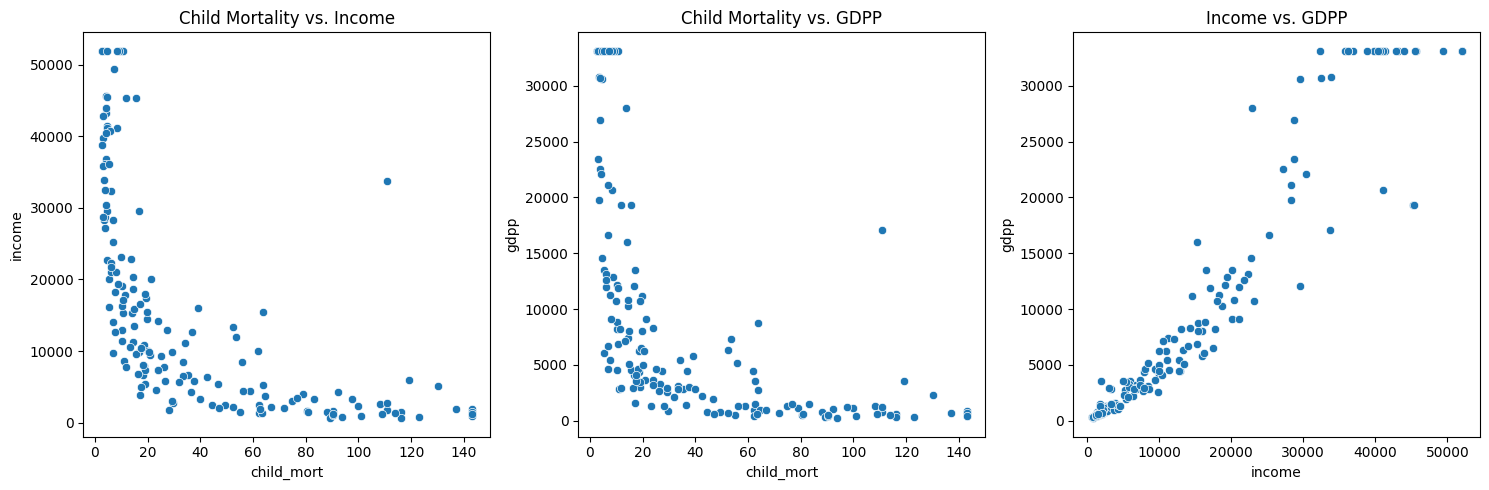

In [109]:
import matplotlib.pyplot as plt
# Scatter plot on the most correlated features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='child_mort', y='income', data=df)
plt.title('Child Mortality vs. Income')

plt.subplot(1, 3, 2)
sns.scatterplot(x='child_mort', y='gdpp', data=df)
plt.title('Child Mortality vs. GDPP')

plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='gdpp', data=df)
plt.title('Income vs. GDPP')

plt.tight_layout()
plt.show()


**Hypothesis Tests**

In [110]:
# T-test on health Life_expec
import scipy.stats as stats

# Calculate the median health spending
median_health_spending = df['health'].median()

# Create two groups based on health spending
high_spending_group = df[df['health'] > median_health_spending]['life_expec']
low_spending_group = df[df['health'] <= median_health_spending]['life_expec']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(high_spending_group, low_spending_group)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in life expectancy between countries with high and low health spending.")
else:
    print("There is no statistically significant difference in life expectancy between countries with high and low health spending.")


T-statistic: 2.934400353862084
P-value: 0.0038183094454471724
There is a statistically significant difference in life expectancy between countries with high and low health spending.


In [111]:

# Calculating the correlation between Total_fertility and Income per person
correlation_coefficient = df['total_fer'].corr(df['income'])

print(f"Correlation coefficient between Total_fertility and Income per person: {correlation_coefficient}")

# Perform a t-test to check for a significant difference in Income per person between countries with high and low Total_fertility rates
# Calculate the median Total_fertility rate
median_total_fer = df['total_fer'].median()

# Create two groups based on total_fer
high_fertility_group = df[df['total_fer'] > median_total_fer]['income']
low_fertility_group = df[df['total_fer'] <= median_total_fer]['income']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(high_fertility_group, low_fertility_group)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in income per person between countries with high and low total fertility rates.")
else:
    print("There is no statistically significant difference in income per person between countries with high and low total fertility rates.")


Correlation coefficient between Total_fertility and Income per person: -0.5778315523171372
T-statistic: -9.534636109433794
P-value: 1.9409124230951254e-17
There is a statistically significant difference in income per person between countries with high and low total fertility rates.


In [112]:
# Median income
median_income = df['income'].median()

# Create two groups based on income
high_income_group = df[df['income'] > median_income]['child_mort']
low_income_group = df[df['income'] <= median_income]['child_mort']

# t-test
t_statistic, p_value = stats.ttest_ind(high_income_group, low_income_group)

# results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("There is a statistically significant difference in child mortality rates between high and low-income countries.")
else:
    print("There is no statistically significant difference in child mortality rates between high and low-income countries.")

# Calculate the correlation between income and child mortality
correlation_coefficient, p_value = stats.pearsonr(df['income'], df['child_mort'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("There is a statistically significant correlation between income and child mortality rates.")
    if correlation_coefficient < 0:
        print("The correlation is negative, indicating that higher income is associated with lower child mortality.")
    else:
        print("The correlation is positive, indicating that higher income is associated with higher child mortality.")
else:
    print("There is no statistically significant correlation between income and child mortality rates.")


T-statistic: -10.61407031234206
P-value: 2.1749807885371914e-20
There is a statistically significant difference in child mortality rates between high and low-income countries.
Pearson correlation coefficient: -0.617662012105596
P-value: 6.064942656234187e-19
There is a statistically significant correlation between income and child mortality rates.
The correlation is negative, indicating that higher income is associated with lower child mortality.


In [113]:
# Calculating the correlation between inflation and GDP per capita
correlation_coefficient = df['inflation'].corr(df['gdpp'])
print(f"Correlation coefficient between inflation and GDP per capita: {correlation_coefficient}")

# Perform a t-test to compare mean GDP per capita between high and low inflation countries
median_inflation = df['inflation'].median()
high_inflation_group = df[df['inflation'] > median_inflation]['gdpp']
low_inflation_group = df[df['inflation'] <= median_inflation]['gdpp']
t_statistic, p_value = stats.ttest_ind(high_inflation_group, low_inflation_group)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference in mean GDP per capita between countries with high and low inflation.")
else:
    print("There is no statistically significant difference in mean GDP per capita between countries with high and low inflation.")


Correlation coefficient between inflation and GDP per capita: -0.24268525259701357
T-statistic: -4.415327538034445
P-value: 1.817509047801304e-05
There is a statistically significant difference in mean GDP per capita between countries with high and low inflation.


In [114]:

# Identify countries with low income and high child mortality
low_income_high_mortality = df[(df['income_bin'] == 'Low') & (df['child_mort'] > df['child_mort'].median())]

# Countries that need help based on low income and high child mortality
countries_needing_help = low_income_high_mortality[['country', 'child_mort', 'income']]

print("Countries needing assistance (Low Income & High Child Mortality):")
for index, row in countries_needing_help.iterrows():
    print(f"- {row['country']}: Child Mortality Rate = {row['child_mort']}, Income = {row['income']}")




Countries needing assistance (Low Income & High Child Mortality):
- Afghanistan: Child Mortality Rate = 90.2, Income = 1610.0
- Angola: Child Mortality Rate = 119.0, Income = 5900.0
- Bangladesh: Child Mortality Rate = 49.4, Income = 2440.0
- Benin: Child Mortality Rate = 111.0, Income = 1820.0
- Bhutan: Child Mortality Rate = 42.7, Income = 6420.0
- Bolivia: Child Mortality Rate = 46.6, Income = 5410.0
- Burkina Faso: Child Mortality Rate = 116.0, Income = 1430.0
- Burundi: Child Mortality Rate = 93.6, Income = 764.0
- Cambodia: Child Mortality Rate = 44.4, Income = 2520.0
- Cameroon: Child Mortality Rate = 108.0, Income = 2660.0
- Cape Verde: Child Mortality Rate = 26.5, Income = 5830.0
- Central African Republic: Child Mortality Rate = 142.875, Income = 888.0
- Chad: Child Mortality Rate = 142.875, Income = 1930.0
- Comoros: Child Mortality Rate = 88.2, Income = 1410.0
- Congo, Dem. Rep.: Child Mortality Rate = 116.0, Income = 609.0
- Congo, Rep.: Child Mortality Rate = 63.9, Income

**ML Modeling**

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify numerical and categorical features
# Remove inplace=True and reassign the result to df
numerical_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
categorical_features = ['country']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Set sparse_output=False
    ])

# Fit and transform the data
df_processed = preprocessor.fit_transform(df)

# Convert the processed data back to a DataFrame (optional but recommended for better readability and analysis)
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
df_processed = pd.DataFrame(df_processed, columns=feature_names)
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
# Feature Engineering

# 1. Indicators
df_processed['High_Child_Mortality'] = (df_processed['child_mort'] > df_processed['child_mort'].median()).astype(int)

# 2. Ratios
df_processed['Export_Import_Ratio'] = df_processed['exports'] / df_processed['imports']
df_processed['Export_Import_Ratio'] = df_processed['Export_Import_Ratio'].replace([np.inf, -np.inf], np.nan).fillna(0) # Handle potential division by zero

# Display the processed DataFrame
df_processed.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,High_Child_Mortality,Export_Import_Ratio
0,1.369802,-1.138280,0.279088,-0.082455,-0.943936,0.157336,-1.619092,1.902882,-0.846341,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13.804868
1,-0.550464,-0.479658,-0.097016,0.070837,-0.395181,-0.312347,0.647866,-0.859973,-0.540827,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-6.771327
2,-0.271295,-0.099122,-0.966073,-0.641762,-0.199291,0.789274,0.670423,-0.038404,-0.508868,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.154452
3,2.121210,0.775381,-1.448071,-0.165315,-0.660984,1.387054,-1.179234,2.128151,-0.589198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,-4.690317
4,-0.714835,0.160668,-0.286894,0.497568,0.209637,-0.601749,0.704258,-0.541946,0.159686,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.322907


In [116]:
df[df['country']=="Haiti"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_bin
66,Haiti,142.875,15.3,6.91,64.7,1500.0,5.45,32.1,3.33,662.0,Low


**Model selection**

In [117]:

# Drop irrelevant columns for clustering
columns_to_drop = ['country','High_Child_Mortality','Export_Import_Ratio']
df_processed = df_processed.drop(columns=columns_to_drop, errors='ignore')

# Display the processed DataFrame after dropping columns
df_processed.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_Afghanistan,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia
0,1.369802,-1.138280,0.279088,-0.082455,-0.943936,0.157336,-1.619092,1.902882,-0.846341,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.550464,-0.479658,-0.097016,0.070837,-0.395181,-0.312347,0.647866,-0.859973,-0.540827,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.271295,-0.099122,-0.966073,-0.641762,-0.199291,0.789274,0.670423,-0.038404,-0.508868,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.121210,0.775381,-1.448071,-0.165315,-0.660984,1.387054,-1.179234,2.128151,-0.589198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.714835,0.160668,-0.286894,0.497568,0.209637,-0.601749,0.704258,-0.541946,0.159686,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


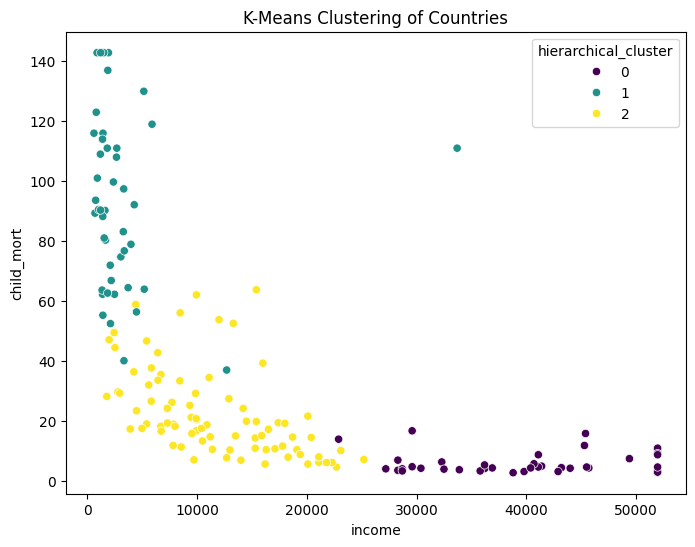

In [118]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
# Cut the dendrogram at distance 22 to form flat clusters
df['hierarchical_cluster'] = hierarchical.fit_predict(df_processed)
# df['hierarchical_cluster'] = hierarchical.fit_predict(df_processed)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='child_mort', hue='hierarchical_cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Countries')
plt.show()


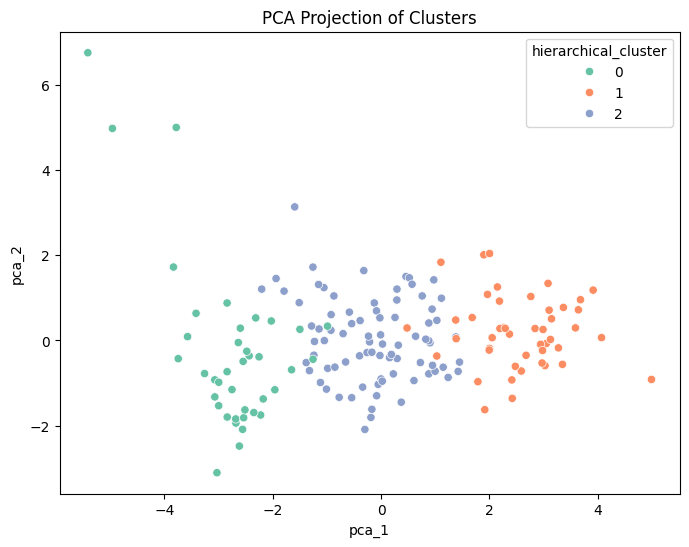

In [119]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_processed)
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca_1', y='pca_2', hue='hierarchical_cluster', data=df, palette='Set2')
plt.title('PCA Projection of Clusters')
plt.show()

In [120]:
# Summary statistics by cluster
cluster_summary = df.groupby('hierarchical_cluster').mean(numeric_only=True)
cluster_summary

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,pca_1,pca_2
hierarchical_cluster,,,,,,,,,,,
0,5.917949,57.800000,8.387692,49.638462,39947.179487,3.648385,79.748718,1.841026,29629.487179,-2.754831,-0.288143
1,91.404348,26.759109,6.410652,42.838389,3158.760870,12.018152,59.797826,5.035000,1464.521739,2.578121,0.201149
2,22.685366,41.220488,6.295244,47.856098,11654.390244,7.371268,72.218293,2.303659,6167.634146,-0.136038,0.024204


In [121]:
import pickle
# Save KMeans model
with open('hierarchical_model.pkl', 'wb') as f:
    pickle.dump(hierarchical, f)

In [122]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_bin,hierarchical_cluster,pca_1,pca_2
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Low,1,3.050142,-0.071525
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Low,2,-0.398258,-0.360185
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Lower-Middle,2,0.295928,-0.423429
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Low,1,3.082371,1.340992
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Lower-Middle,2,-1.145978,0.270227


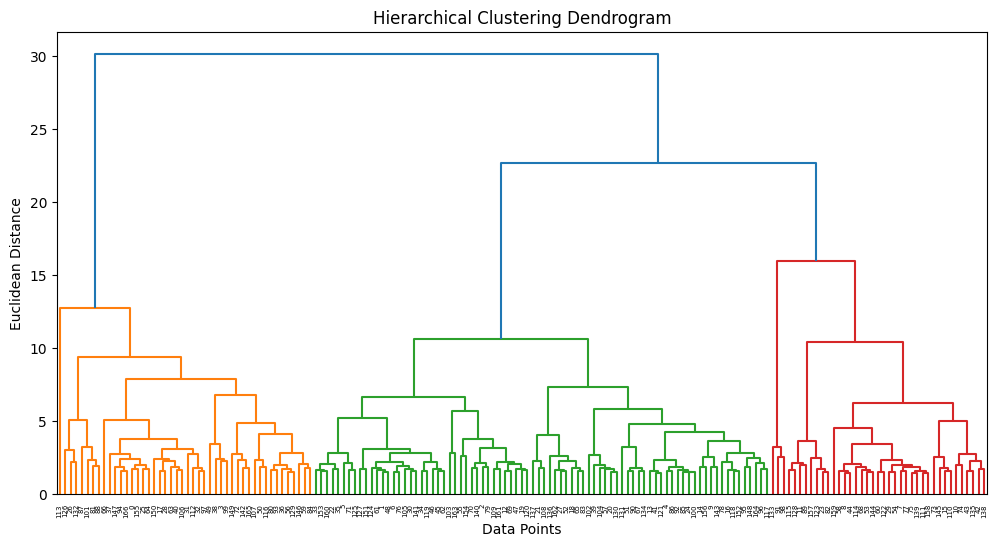

In [123]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Assuming df_processed is your scaled/preprocessed data
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
dend = sch.dendrogram(sch.linkage(df_processed, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

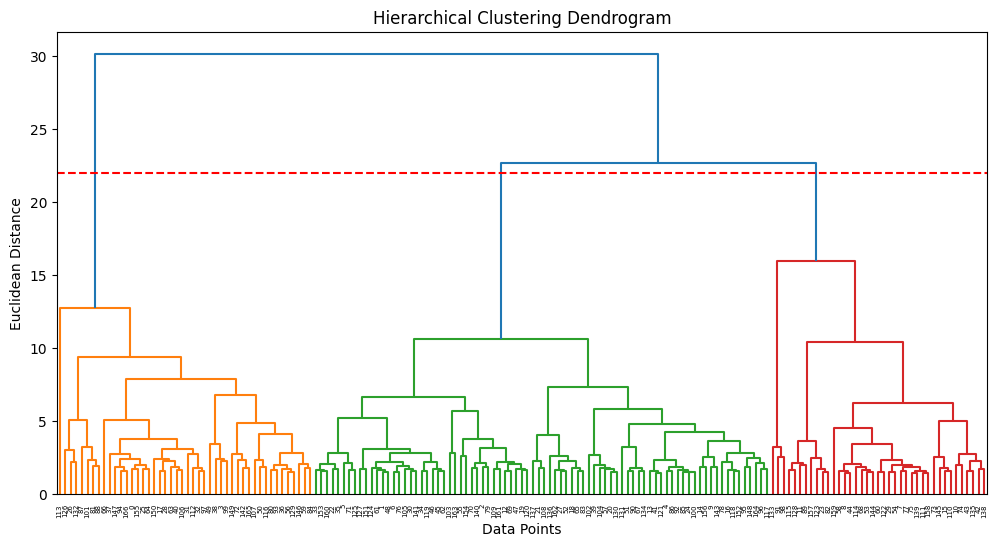

In [124]:
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
dend = sch.dendrogram(sch.linkage(df_processed, method='ward'))
plt.axhline(y=22, color='r', linestyle='--')  # Adjust 22 as needed based on the visual gap
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


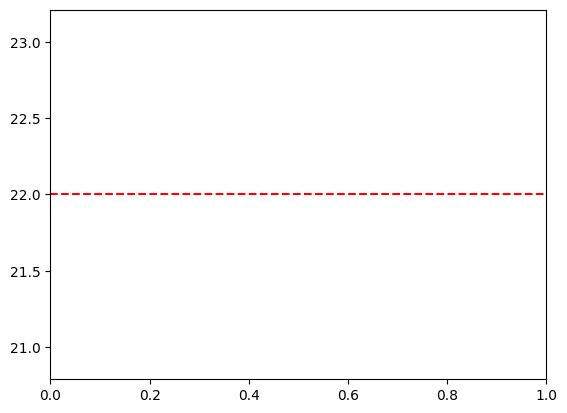

In [125]:
plt.axhline(y=22, color='r', linestyle='--')  # Suggested cutoff for 3 clusters


In [126]:
with open('hierarchical_model.pkl', 'rb') as f:
    hierarchical_model = pickle.load(f)

In [127]:
hierarchical_model

AgglomerativeClustering(n_clusters=3)

In [128]:
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering

# Load the trained model
with open('hierarchical_model.pkl', 'rb') as f:
    model = pickle.load(f)



In [129]:
new_predictions = model.fit_predict(df_processed)

# Add predictions to the original DataFrame (df)
df['new_cluster_labels'] = new_predictions

# Print or visualize the results
df[['country', 'new_cluster_labels']]


,country,new_cluster_labels
0,Afghanistan,1
1,Albania,2
2,Algeria,2
3,Angola,1
4,Antigua and Barbuda,2
...,...,...
162,Vanuatu,2
163,Venezuela,2
164,Vietnam,2
165,Yemen,1


In [130]:
df_processed.to_pickle("clustered_data.pkl")

In [131]:

new_country_data = pd.DataFrame({
    'country': ['NewCountry'],
    'child_mort': [120],  # Example value, replace with actual data
    'exports': [30],
    'health': [5],
    'imports': [40],
    'income': [1300],
    'inflation': [5],
    'life_expec': [65],
    'total_fer': [2.5],
    'gdpp': [10000]
})

# Concatenate with original data (assuming df is defined from the previous code)

# Load preprocessor
import pickle
with open('preprocessor.pkl', 'rb') as f:
    preprocessor = pickle.load(f)

clustered_df = pd.read_pickle("clustered_data.pkl")

# Preprocess new data using the loaded preprocessor
new_country_processed = preprocessor.transform(new_country_data)

numerical_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
categorical_features = ['country']
feature_names = numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
new_country_processed = pd.DataFrame(new_country_processed, columns=feature_names)
new_country_processed = pd.concat([new_country_processed,clustered_df])
# Load the hierarchical clustering model
with open('hierarchical_model.pkl', 'rb') as f:
    hierarchical_model = pickle.load(f)


# Drop the same columns that were dropped for training
columns_to_drop = ['country','High_Child_Mortality','Export_Import_Ratio']
new_country_processed = new_country_processed.drop(columns=columns_to_drop, errors='ignore')

# Make predictions
new_country_cluster = hierarchical_model.fit_predict(new_country_processed)

new_country_cluster[0]


np.int64(1)